In [ ]:
pip install util-gfsilveira

In [ ]:
import os #organizador de pasta
import numpy as np #estruturação dos dados
import matplotlib.pyplot as plt #plot gráfico
import seaborn as sns #plot gráfico
from PIL import Image #visualização de img
import pandas as pd #estruturação dos dados
from util import meus_uteis, timeProcess
import joblib #convertendo imagens em valores numéricos .gz

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (82.8 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree ./drive/MyDrive/teste/imagem_conjunto/ -af >> estrutura_diretorio_Eloiza_25_01_24.txt

In [ ]:
def limpa_lista_img(path_img: str) -> str:
    path_img = path_img.replace("│\xa0\xa0", "")
    path_img = path_img.replace("├──", "")
    path_img = path_img.replace("└──", "")
    path_img = path_img.replace("\n", "")
    path_img = path_img.strip()
 #   path_img = path_img.replace("./", "./data/")
    return path_img

In [ ]:
#abrindo o arquivo:
with open("/content/drive/MyDrive/teste/estrutura_diretorio_Eloiza_25_01_24.txt", "r") as file:
    lista_arquivos = file.readlines()
lista_arquivos = [limpa_lista_img(i) for i in lista_arquivos if ".tif" in i] #laço para chamar os arquivos em formato tif
#lista_arquivos #listando os 3 primeiros arquivos
len(lista_arquivos)

561

In [ ]:
lista_arquivos_vir = [i for i in lista_arquivos if "/CHO-745/VIR/" in i]
lista_arquivos_fluo_vir = [i for i in lista_arquivos_vir if "ch01.tif" in i]

lista_arquivos_fluo_vir[:3]
len(lista_arquivos_fluo_vir)

31

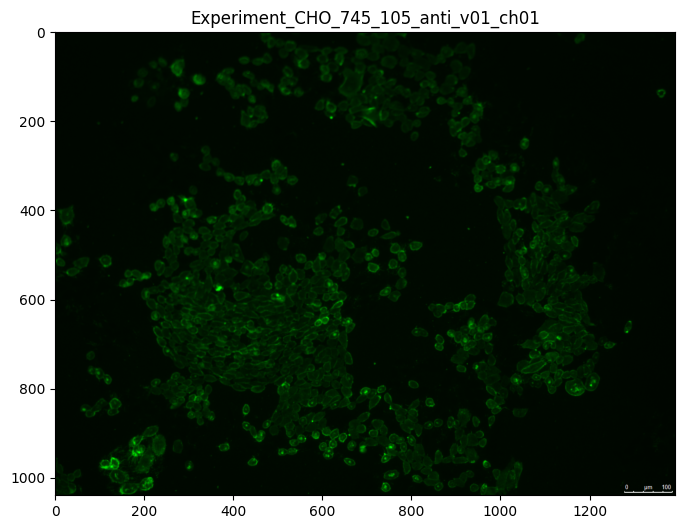

In [ ]:
path = lista_arquivos_fluo_vir[10] #chamando a primeira imagem
img = Image.open(path) #abrinado a primeira imagem

plt.figure(figsize=(8,8)) #tamanho da imagem
plt.imshow(img) #abrindo a imagem
plt.title(path[50:-4]) #título recortando o nome do título que corresponde o caminho da imagem[50:-4]
plt.show()

#Dataframe com as imagens e valores originais

In [ ]:
#definindo uma função que converte as imagens em matriz numpy
def img_to_df(img) -> pd.DataFrame:
  img_array = np.array(img, dtype="float64")/255 #organizando o tamanho da matriz
  img_df = pd.DataFrame(columns=["red"], data=img_array[:,:,0].reshape(-1,1)) #aqui a cor vermelha da imagem foi anulada e os valores entraram como zero na coluna da df
  img_df["green"] = img_array[:,:,1].reshape(-1,1) # mantendo apenas a camada verde (de interesse)
  img_df["blue"] = img_array[:,:,2].reshape(-1,1) #mesma coisa que foi feita na camada vermelha foi feita com a azul

  return img_df

In [ ]:
img_df_vir = img_to_df(img=img) #chamando a função criada e como parâmetro está sendo passado a imagem organizada na pasta lá em cima.
img_df_vir.head()

,red,green,blue
0,0.0,0.031373,0.0
1,0.0,0.023529,0.0
2,0.0,0.031373,0.0
3,0.0,0.027451,0.0
4,0.0,0.027451,0.0


In [ ]:
img_df_orig = pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário
for path in lista_arquivos_fluo_vir:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  img_df_modif = img_to_df(img=img) #retirando os outliers dos dados da df

  img_df_orig[path[61:-4]] = img_df_modif['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[61:-4]] = img_df_modif

img_df_orig.head()

,CHO_745_096_anti_v01_ch01,CHO_745_096_anti_v02_ch01,CHO_745_096_anti_v03_ch01,CHO_745_096_anti_v04_ch01,CHO_745_096_anti_v05_ch01,CHO_745_096_v01_ch01,CHO_745_096_v02_ch01,CHO_745_096_v03_ch01,CHO_745_096_v04_ch01,CHO_745_096_v05_ch01,...,CHO_745_105_v02_ch01,CHO_745_105_v03_ch01,CHO_745_105_v04_ch01,CHO_745_105_v05_ch01,CHO_745_105_v06_ch01,CHO_745_105_v07_ch01,CHO_745_105_v08_ch01,CHO_745_105_v09_ch01,CHO_745_105_v10_ch01,CHO_745_105_v11_ch01
0,0.019608,0.019608,0.023529,0.019608,0.035294,0.015686,0.019608,0.023529,0.019608,0.015686,...,0.035294,0.137255,0.023529,0.031373,0.027451,0.184314,0.031373,0.031373,0.027451,0.219608
1,0.015686,0.019608,0.023529,0.023529,0.035294,0.019608,0.019608,0.023529,0.015686,0.019608,...,0.027451,0.137255,0.023529,0.031373,0.031373,0.172549,0.031373,0.035294,0.023529,0.215686
2,0.015686,0.023529,0.023529,0.023529,0.031373,0.019608,0.019608,0.027451,0.019608,0.015686,...,0.027451,0.137255,0.023529,0.031373,0.027451,0.168627,0.031373,0.031373,0.027451,0.196078
3,0.019608,0.023529,0.019608,0.019608,0.031373,0.019608,0.019608,0.035294,0.019608,0.019608,...,0.031373,0.137255,0.023529,0.027451,0.027451,0.176471,0.027451,0.031373,0.023529,0.196078
4,0.023529,0.019608,0.023529,0.023529,0.031373,0.023529,0.019608,0.035294,0.019608,0.019608,...,0.031373,0.137255,0.023529,0.027451,0.027451,0.168627,0.031373,0.031373,0.027451,0.203922


Salvando a df de imagens originais

In [ ]:
data = timeProcess()[1]
joblib.dump(pd.DataFrame(img_df_orig), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original-dataframe-CHO745-VIR-fluorescente-'+data+'.gz')

['/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original-dataframe-CHO745-VIR-fluorescente-2024-6-4.gz']

#Criando uma função para retirada do excesso de intensidade do pixel encontrados nas imagens:

In [ ]:
img_df_green = img_df_vir['green'].copy() #copiando apenas a coluna verde da df original
freq = img_df_green.value_counts(normalize=True).to_frame().reset_index().sort_values('green', ascending=False)
#Acima: foi calculado a frequencia dos pixels na camada verde, convertido essa serie em DF, resetado index e organizado do maior para menor valor de pixel
freq

,green,proportion
81,1.000000,2.728504e-04
246,0.992157,6.907604e-07
229,0.988235,2.072281e-06
243,0.984314,1.381521e-06
244,0.980392,1.381521e-06
...,...,...
1,0.031373,1.804273e-01
2,0.027451,1.233843e-01
5,0.023529,2.194684e-02
77,0.019608,3.046253e-04


In [ ]:
soma = 0 #igualando a variavel a 0
for n in range(len(freq)): #iteração para percorrer na df e somar os valores da coluna 1
  soma += freq.iloc[n,1]
  if soma >= 0.001: #5% dos dados
    print(soma)
    break
print(freq.iloc[n,:])

0.001011963969938108
green         0.584314
proportion    0.000019
Name: 149, dtype: float64


In [ ]:
img_df_vir_cho = img_df_vir.copy()

In [ ]:
#novo_valor = 0.0  # converter os valores em zero
#img_df_vir_cho.loc[img_df_vir_cho['green'] >= 0.584314, 'green'] = novo_valor
#img_df_vir_cho

In [ ]:
#Criando função pra que receba uma df, indique qual coluna usar, o valor a ser alterado e o novo valor
def filter_and_replace(dataframe, column_name, threshold, new_value):
    """
    Filtra os valores da coluna especificada na DataFrame que sejam maiores ou iguais ao limite
    especificado e substitui-os pelo novo valor.

    Args:
        dataframe (pandas.DataFrame): A DataFrame a ser filtrada e modificada.
        column_name (str): O nome da coluna que será filtrada e modificada.
        threshold (float): O valor limite para o filtro.
        new_value (float): O novo valor a ser atribuído aos valores filtrados.

    Returns:
        pandas.DataFrame: A DataFrame modificada.
    """
    dataframe.loc[dataframe[column_name] >= threshold, column_name] = new_value
    return dataframe

In [ ]:
novo_valor = 0.0
img_df_second_filtrada = filter_and_replace(img_df_vir_cho, 'green', 0.584314, novo_valor)
img_df_second_filtrada

,red,green,blue
0,0.0,0.031373,0.0
1,0.0,0.023529,0.0
2,0.0,0.031373,0.0
3,0.0,0.027451,0.0
4,0.0,0.027451,0.0
...,...,...,...
1447675,0.0,0.035294,0.0
1447676,0.0,0.031373,0.0
1447677,0.0,0.027451,0.0
1447678,0.0,0.027451,0.0


In [ ]:
def maxplot() -> float:
  if img_df_vir.max().max() > img_df_second_filtrada.max().max():
    max = img_df_vir.max().max()
  else:
    max = img_df_second_filtrada.max().max()

  max_freq = max/10

  return max + max_freq

(0.0, 1.1)

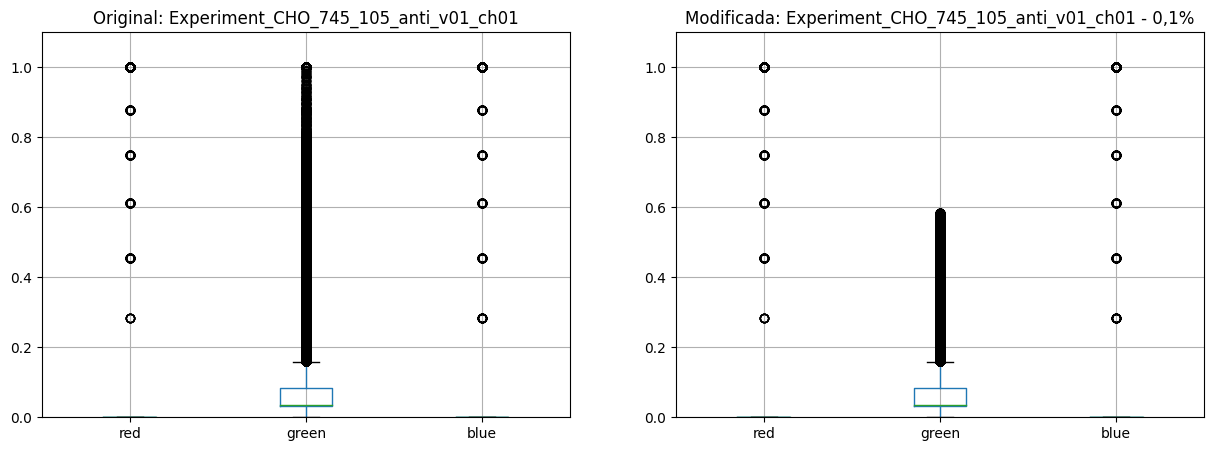

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title(f"Original: {path[50:-4]}")
img_df_vir.boxplot()
plt.ylim(0, maxplot())


plt.subplot(1, 2, 2)
plt.title(f"Modificada: {path[50:-4]} - 0,1%")
img_df_second_filtrada.boxplot()
plt.ylim(0, maxplot())
plt.show()

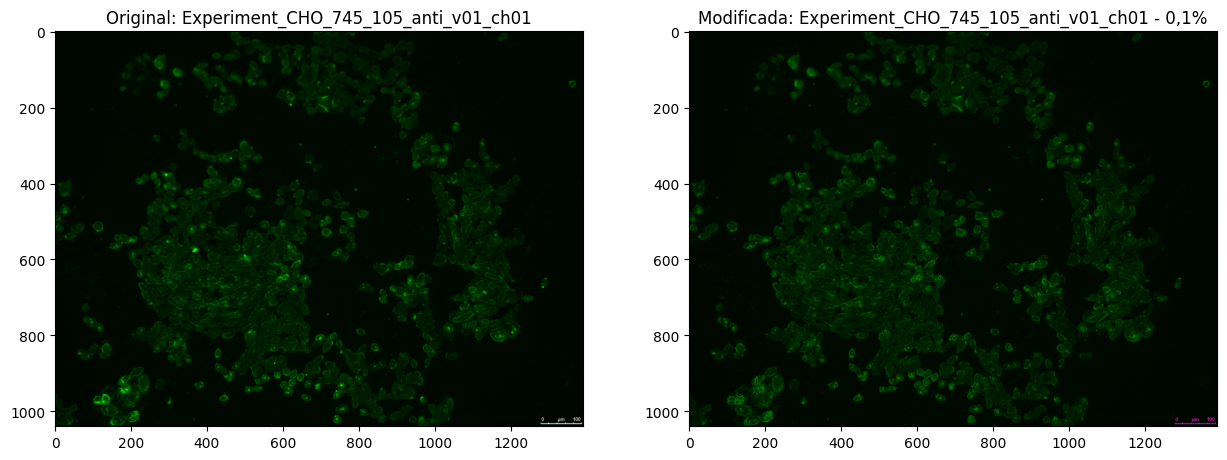

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_df_vir).reshape(1040, 1392, 3))
plt.title(f"Original: {path[50:-4]}")

plt.subplot(1, 2, 2)
plt.imshow(np.array(img_df_second_filtrada).reshape(1040, 1392, 3))
plt.title(f"Modificada: {path[50:-4]} - 0,1%")

# plt.subplot(1, 2, 3)
# plt.imshow(np.array(img_df_copy).reshape(1040, 1392, 3))
# plt.title(f"Modificada: {path[50:-4]}")
plt.show()

#Dataframe CHO 745 proteína VIR Filtrada:

In [ ]:
img_df_grupo_vir= pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário

for path in lista_arquivos_fluo_vir:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  img_df_modif = filter_and_replace(img_to_df(img=img), 'green', 0.584314, novo_valor)
  img_df_grupo_vir[path[61:-4]] = img_df_modif['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[61:-4]] = img_df_modif

img_df_grupo_vir.head()

,CHO_745_096_anti_v01_ch01,CHO_745_096_anti_v02_ch01,CHO_745_096_anti_v03_ch01,CHO_745_096_anti_v04_ch01,CHO_745_096_anti_v05_ch01,CHO_745_096_v01_ch01,CHO_745_096_v02_ch01,CHO_745_096_v03_ch01,CHO_745_096_v04_ch01,CHO_745_096_v05_ch01,...,CHO_745_105_v02_ch01,CHO_745_105_v03_ch01,CHO_745_105_v04_ch01,CHO_745_105_v05_ch01,CHO_745_105_v06_ch01,CHO_745_105_v07_ch01,CHO_745_105_v08_ch01,CHO_745_105_v09_ch01,CHO_745_105_v10_ch01,CHO_745_105_v11_ch01
0,0.019608,0.019608,0.023529,0.019608,0.035294,0.015686,0.019608,0.023529,0.019608,0.015686,...,0.035294,0.137255,0.023529,0.031373,0.027451,0.184314,0.031373,0.031373,0.027451,0.219608
1,0.015686,0.019608,0.023529,0.023529,0.035294,0.019608,0.019608,0.023529,0.015686,0.019608,...,0.027451,0.137255,0.023529,0.031373,0.031373,0.172549,0.031373,0.035294,0.023529,0.215686
2,0.015686,0.023529,0.023529,0.023529,0.031373,0.019608,0.019608,0.027451,0.019608,0.015686,...,0.027451,0.137255,0.023529,0.031373,0.027451,0.168627,0.031373,0.031373,0.027451,0.196078
3,0.019608,0.023529,0.019608,0.019608,0.031373,0.019608,0.019608,0.035294,0.019608,0.019608,...,0.031373,0.137255,0.023529,0.027451,0.027451,0.176471,0.027451,0.031373,0.023529,0.196078
4,0.023529,0.019608,0.023529,0.023529,0.031373,0.023529,0.019608,0.035294,0.019608,0.019608,...,0.031373,0.137255,0.023529,0.027451,0.027451,0.168627,0.031373,0.031373,0.027451,0.203922


In [ ]:
median_values_gst_cho = img_df_grupo_vir.median()
median_values_gst_cho

CHO_745_096_anti_v01_ch01    0.027451
CHO_745_096_anti_v02_ch01    0.027451
CHO_745_096_anti_v03_ch01    0.027451
CHO_745_096_anti_v04_ch01    0.027451
CHO_745_096_anti_v05_ch01    0.031373
CHO_745_096_v01_ch01         0.027451
CHO_745_096_v02_ch01         0.027451
CHO_745_096_v03_ch01         0.027451
CHO_745_096_v04_ch01         0.023529
CHO_745_096_v05_ch01         0.023529
CHO_745_105_anti_v01_ch01    0.035294
CHO_745_105_anti_v02_ch01    0.039216
CHO_745_105_anti_v03_ch01    0.039216
CHO_745_105_anti_v04_ch01    0.039216
CHO_745_105_anti_v05_ch01    0.043137
CHO_745_105_anti_v06_ch01    0.035294
CHO_745_105_anti_v07_ch01    0.043137
CHO_745_105_anti_v08_ch01    0.039216
CHO_745_105_anti_v09_ch01    0.035294
CHO_745_105_anti_v10_ch01    0.043137
CHO_745_105_v01_ch01         0.039216
CHO_745_105_v02_ch01         0.062745
CHO_745_105_v03_ch01         0.105882
CHO_745_105_v04_ch01         0.035294
CHO_745_105_v05_ch01         0.066667
CHO_745_105_v06_ch01         0.039216
CHO_745_105_

In [ ]:
img_df_grupo_vir.describe()

,CHO_745_096_anti_v01_ch01,CHO_745_096_anti_v02_ch01,CHO_745_096_anti_v03_ch01,CHO_745_096_anti_v04_ch01,CHO_745_096_anti_v05_ch01,CHO_745_096_v01_ch01,CHO_745_096_v02_ch01,CHO_745_096_v03_ch01,CHO_745_096_v04_ch01,CHO_745_096_v05_ch01,...,CHO_745_105_v02_ch01,CHO_745_105_v03_ch01,CHO_745_105_v04_ch01,CHO_745_105_v05_ch01,CHO_745_105_v06_ch01,CHO_745_105_v07_ch01,CHO_745_105_v08_ch01,CHO_745_105_v09_ch01,CHO_745_105_v10_ch01,CHO_745_105_v11_ch01
count,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,...,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06
mean,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,...,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02,6.425395e-02
std,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,...,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02,5.799141e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,...,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02,3.137255e-02
50%,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,...,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02,3.529412e-02
75%,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,...,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02,8.235294e-02
max,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,...,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01


In [ ]:
data = timeProcess()[1]
joblib.dump(pd.DataFrame(img_df_grupo_vir), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/2-dataframe-CHO745-VIR-fluorescente-0,1%-'+data+'.gz')

['/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/2-dataframe-CHO745-VIR-fluorescente-0,1%-2024-5-29.gz']